**ANOVA Analysis And Regression Analysis Calculations**

Importing required packages for reading csv file and plotting graphs

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate
import statsmodels.api as sm


**Anova Analysis**

In [11]:

def calculate_anova(data, group_col, value_col):

    groups = data.groupby(group_col)[value_col]
    group_means = groups.mean()
    n_groups = len(group_means)
    n_total = len(data)

    # Calculate Total Sum of Squares (SS_total)
    overall_mean = data[value_col].mean()
    total_sum_of_squares = ((data[value_col] - overall_mean) ** 2).sum()

    # Calculate Sum of Squares Between Groups (SS_between)
    sum_of_squares_between = (n_total / n_groups) * ((group_means - overall_mean) ** 2).sum()

    # Degrees of Freedom
    df_between = n_groups - 1
    df_within = n_total - n_groups

    # Calculate Mean Square Between Groups (MS_between)
    mean_square_between = sum_of_squares_between / df_between

    # Calculate Sum of Squares Within Groups (SS_within)
    sum_of_squares_within = total_sum_of_squares - sum_of_squares_between

    # Calculate Mean Square Within Groups (MS_within)
    mean_square_within = sum_of_squares_within / df_within

    # Calculate F-statistic and p-value
    f_statistic = mean_square_between / mean_square_within
    p_value = stats.f.sf(f_statistic, df_between, df_within)

    return f_statistic, p_value, df_between, df_within, sum_of_squares_between, mean_square_between, sum_of_squares_within, mean_square_within


Reading the CSV file and Categorizing the players

In [12]:
# Load the dataset
data = pd.read_csv("mlb_players_18.csv")

# Filter out pitchers
data = data[data['position'] != 'P']

# Create groups based on position
outfield = data[data['position'].isin(['CF', 'LF', 'RF'])]['OBP']
infield = data[data['position'].isin(['1B', '2B', '3B', 'SS'])]['OBP']
catcher = data[data['position'] == 'C']['OBP']

# Perform ANOVA analysis
f_statistic, p_value, df_between, df_within, sum_of_squares_between, mean_square_between, sum_of_squares_within, mean_square_within = calculate_anova(data, 'position', 'OBP')


# Store ANOVA results in a list of tuples
anova_results = [
    ("F-Statistic", f_statistic),
    ("P-value", p_value),
    ("Degrees of Freedom (Between Groups)", df_between),
    ("Degrees of Freedom (Within Groups)", df_within),
    ("Sum of Squares Between Groups", sum_of_squares_between),
    ("Mean Square Between Groups", mean_square_between),
    ("Sum of Squares Within Groups", sum_of_squares_within),
    ("Mean Square Within Groups", mean_square_within)
]

# Print ANOVA results in table format
print("ANOVA Results:")
print(tabulate(anova_results, headers=["Variable", "Value"], tablefmt="grid"))


ANOVA Results:
+-------------------------------------+--------------+
| Variable                            |        Value |
+=====================================+==============+
| F-Statistic                         |   3.28713    |
+-------------------------------------+--------------+
| P-value                             |   0.00193458 |
+-------------------------------------+--------------+
| Degrees of Freedom (Between Groups) |   7          |
+-------------------------------------+--------------+
| Degrees of Freedom (Within Groups)  | 620          |
+-------------------------------------+--------------+
| Sum of Squares Between Groups       |   0.111807   |
+-------------------------------------+--------------+
| Mean Square Between Groups          |   0.0159724  |
+-------------------------------------+--------------+
| Sum of Squares Within Groups        |   3.01263    |
+-------------------------------------+--------------+
| Mean Square Within Groups           |   0.004859

Histogram plot

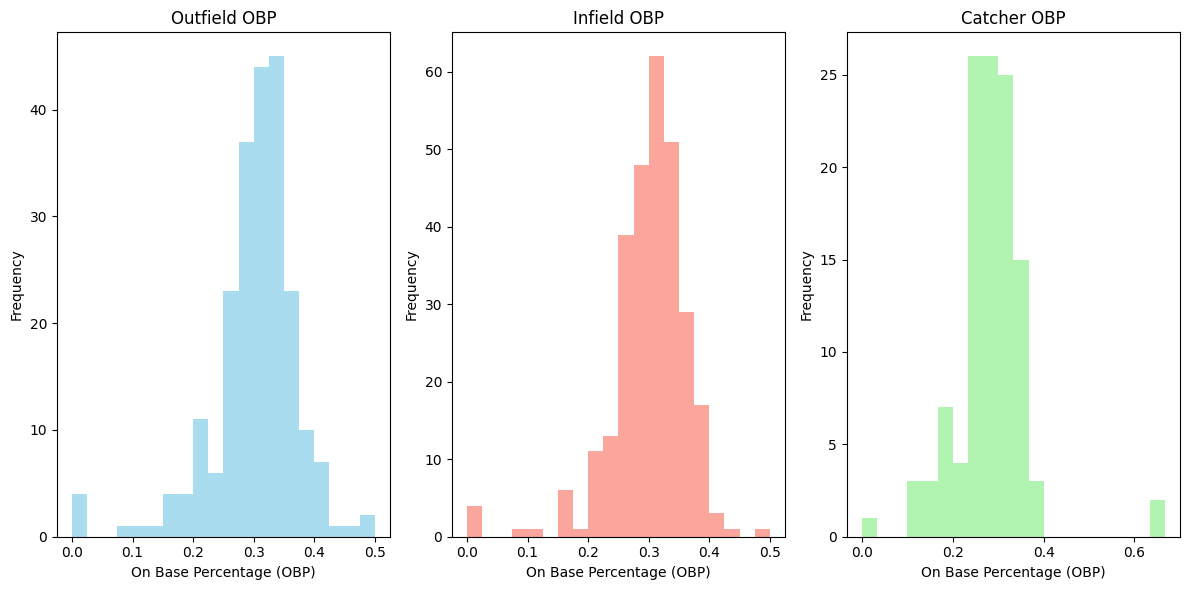

In [13]:
# Histograms for each position
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(outfield, bins=20, color='skyblue', alpha=0.7)
plt.title('Outfield OBP')
plt.xlabel('On Base Percentage (OBP)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(infield, bins=20, color='salmon', alpha=0.7)
plt.title('Infield OBP')
plt.xlabel('On Base Percentage (OBP)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(catcher, bins=20, color='lightgreen', alpha=0.7)
plt.title('Catcher OBP')
plt.xlabel('On Base Percentage (OBP)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Regression Analysis**

In [14]:
#Regression Analysis
def perform_regression_analysis(data, independent_vars, dependent_var):

    X = data[independent_vars]
    Y = data[dependent_var]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    return model
#Printing regression results
def print_regression_results(model):

    print("Regression Results:")
    print(model.summary())


Plots

In [15]:
#Scatter plot
def plot_scatter_matrix(data, variables):

    pd.plotting.scatter_matrix(data[variables], figsize=(10, 8))
    plt.suptitle('Scatterplot Matrix', y=0.92)
    plt.show()
#Point Chart plot
def plot_point_chart(data, independent_vars, dependent_var):

    plt.figure(figsize=(10, 8))
    for var in independent_vars:
        plt.scatter(data[var], data[dependent_var], label=var, alpha=0.5)
    # Add labels and title
    plt.xlabel('Batting Performance')
    plt.ylabel('On Base Percentage (OBP)')
    plt.title('Point Chart of Batting Performance vs OBP')
    plt.legend()
    plt.grid(True)
    plt.show()



Calling all the Functions


AVG: p-value: 0.7654359303683201
SLG: p-value: 0.0
OPS: p-value: 0.0
Adjusted R-squared: 0.9999601880819362
Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    OBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.249e+06
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:59:26   Log-Likelihood:                 3956.9
No. Observations:                 628   AIC:                            -7906.
Df Residuals:                     624   BIC:                            -7888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

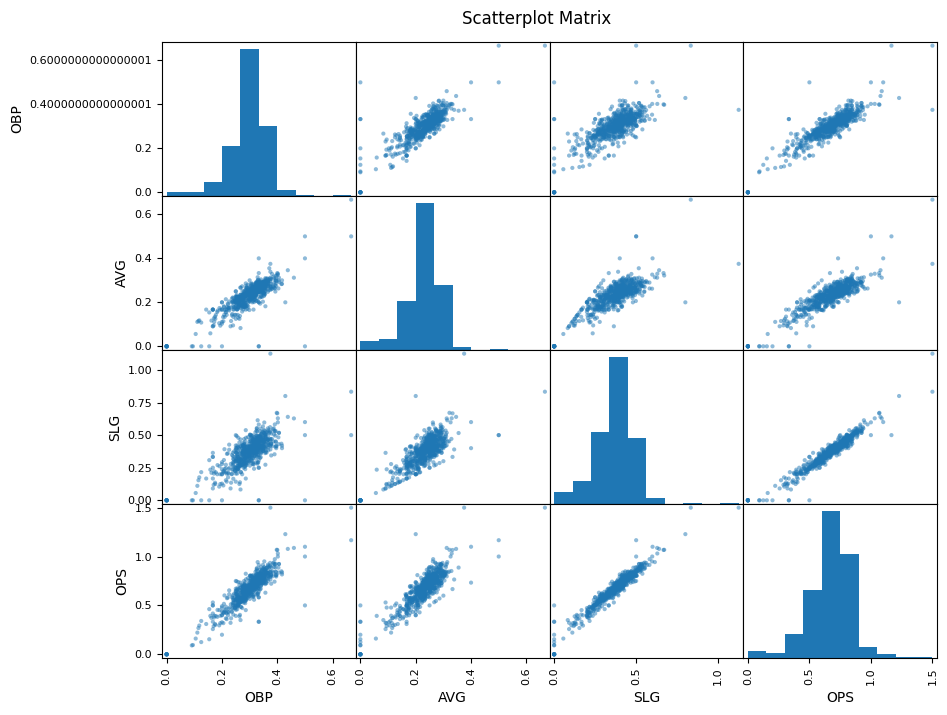

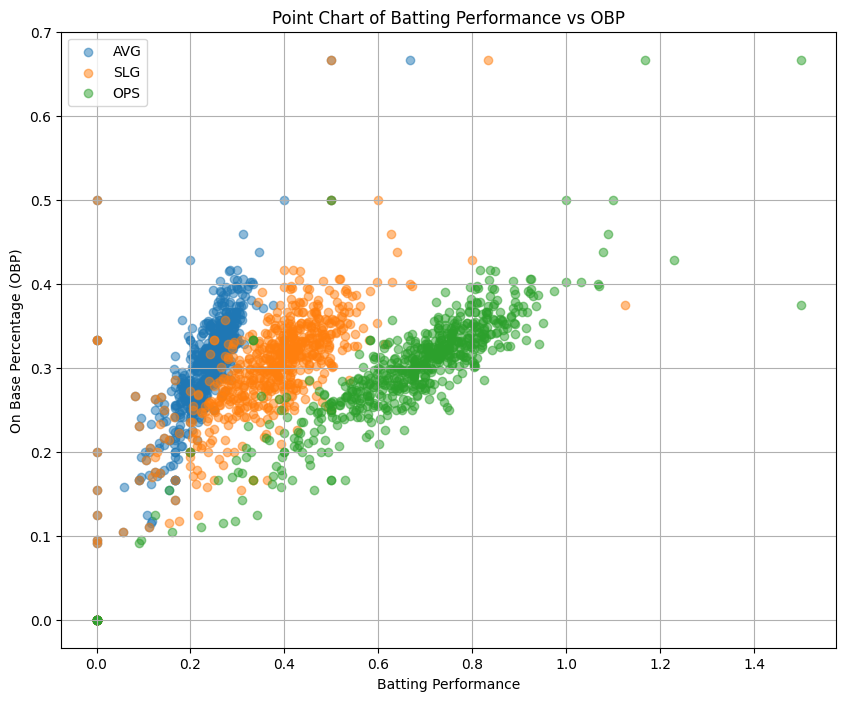

In [17]:
# Define variables
independent_vars = ['AVG', 'SLG', 'OPS']
dependent_var = 'OBP'

#P-value for AVG,SLG,OPS
print("\nAVG: p-value:", p_values['AVG'])
print("SLG: p-value:", p_values['SLG'])
print("OPS: p-value:", p_values['OPS'])
print("Adjusted R-squared:", adjusted_r_squared)

# Perform regression analysis
model = perform_regression_analysis(data, independent_vars, dependent_var)

# Print regression results
print_regression_results(model)

# Plot scatterplot matrix
plot_scatter_matrix(data, [dependent_var] + independent_vars)

# Plot point chart
plot_point_chart(data, independent_vars, dependent_var)
